# Lockdown in the SEIR model

This notebook simulates the introduction of a lockdown into the seir model. 

In [6]:
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.rcParams["figure.figsize"]=(12,4)

## Impact of the  lockdown

This section shows the impact of the lockdown according to its strenght, with the same number of infected at which the lockdown is imposed and the constant dead rate when the number of ICU beds is exceeded. 

In [7]:
def seir_with_lockdown(contacts, infection_rate, recovery_rate, impose_lockdown, lockdown, simulations=200, population=10_000_000, initialy_infected=1):
    """
    This function calculates SEIR model with lockdown.
    The lockdown is imposed when the number of infected is higher than the predefined impose_lockdown value.
    """
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    
    infected[0] = initialy_infected/ population             
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        
        if infected[t]<=impose_lockdown:         #Lockdown is imposed when the number of infected is higher than the predefined value
            contacts_model[t]=contacts
        else:
            contacts_model[t]=contacts*lockdown  #Lockdown makes number of contacts lower (lockdown value is <1)
            
        infected[t+1]=infected[t]+infected[t]*contacts_model[t]*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts_model[t]*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
            
    pyplot.plot(infected,label=f"Lockdown: {lockdown*100}% of normal contats per day")
    pyplot.axhline(impose_lockdown,color="black",linestyle="dotted", alpha=0.5)

In [8]:
def seir_without_lockdown(contacts, infection_rate, recovery_rate,simulations=200,population=10_000_000, initialy_infected=1):
    """This function calculates SEIR model with no lockdown (simulates the base case scenario)"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
            
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
            
    pyplot.plot(infected,color="maroon", linestyle="--",label="Without lockdown")

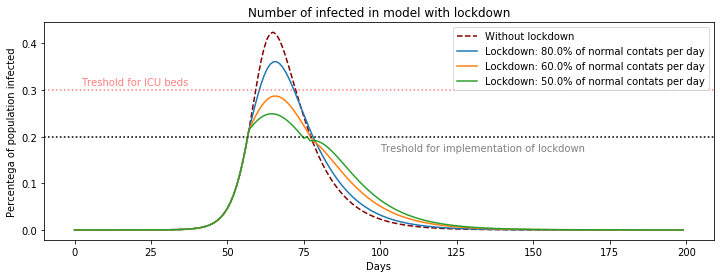

In [9]:
different_lockdowns = [4/5,1.8/3,1.5/3]   #Different strenghs of lockdown T

contacts= 4            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery
mutation_start = 100   #At whitch day mutation start T
impose_lockdown=0.2    #At which percentage of population infected the lockdown is imposed


seir_without_lockdown(contacts, infection_rate, recovery_rate)

for lockdown in different_lockdowns:
    seir_with_lockdown(contacts, infection_rate, recovery_rate,impose_lockdown, lockdown)
    
pyplot.legend()
pyplot.text(2, 0.31,"Treshold for ICU beds",color="red",alpha=0.5)

pyplot.text(100, 0.17,"Treshold for implementation of lockdown",color="black",alpha=0.5)
pyplot.axhline(0.3,color="red",linestyle="dotted",alpha=0.5)
pyplot.ylabel("Percentega of population infected")
pyplot.xlabel("Days")
pyplot.title(f"Number of infected in model with lockdown")
pyplot.show()

## Lenght of the lockdown 

This part calculates the length of the lockdown depending on the different strength of the lockdown and the different criterion  for the implementation of the lockdown. 

In [10]:
def calc_lockdown_lenght(contacts, infection_rate, recovery_rate, impose_lockdown, lockdown, simulations=200, population=10_000_000, initialy_infected=1):
    """This function calculates lenght of the lockdown, and analysisng sensitivity to the strenght of lockdown"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    lenght_of_lockdown = 0
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        
        if infected[t]<=impose_lockdown:
            contacts_model[t]=contacts
            lenght_of_lockdown=lenght_of_lockdown
        else:
            contacts_model[t]=contacts*lockdown
            lenght_of_lockdown=lenght_of_lockdown+1
            
        infected[t+1]=infected[t]+infected[t]*contacts_model[t]*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts_model[t]*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
            
    print(f"Lockdown with strenght {lockdown*100}% of normal contats per day has duration: { lenght_of_lockdown} days.")

In [11]:
different_lockdowns = [4/5,1.8/3,1.5/3]   #Different strenghs of lockdown T

contacts= 4            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery
mutation_start = 100   #At whitch day mutation start T
impose_lockdown=0.2    #At which percentage of population infected the lockdown is imposed

print("")

for lockdown in different_lockdowns:
    calc_lockdown_lenght(contacts, infection_rate, recovery_rate,impose_lockdown, lockdown)


Lockdown with strenght 80.0% of normal contats per day has duration: 21 days.
Lockdown with strenght 60.0% of normal contats per day has duration: 21 days.
Lockdown with strenght 50.0% of normal contats per day has duration: 19 days.


This section showed an interesting result that the length of the lockdown is not very sensitive to the intensity of the lockdown. 

In [12]:
def calc_lockdown_lenght2(contacts, infection_rate, recovery_rate,impose_lockdown, lockdown, simulations=200, population=10_000_000, initialy_infected=1):
    """This function calculates lenght of the lockdown, and analysisng sensitivity to different treshold for start of the lockdown"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    lenght_of_lockdown = 0
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        
        if infected[t]<=impose_lockdown:
            contacts_model[t]=contacts
            lenght_of_lockdown=lenght_of_lockdown
        else:
            contacts_model[t]=contacts*lockdown
            lenght_of_lockdown=lenght_of_lockdown+1
            
        infected[t+1]=infected[t]+infected[t]*contacts_model[t]*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts_model[t]*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
    
    print(f"Lockdown that is imposed after {impose_lockdown*100}% of infected population has duration: {lenght_of_lockdown} days.")

In [13]:
different_impose_lockdowns = [0.1,0.15,0.2]   #Different treshold for imposing lockdowns T

contacts= 4            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery
mutation_start = 100   #At whitch day mutation start T
impose_lockdown=0.2
lockdown=4/5

print("")

for impose_lockdown in different_impose_lockdowns:
    calc_lockdown_lenght2(contacts, infection_rate, recovery_rate,impose_lockdown, lockdown,simulations=200,population=10_000_000, initialy_infected=1)


Lockdown that is imposed after 10.0% of infected population has duration: 34 days.
Lockdown that is imposed after 15.0% of infected population has duration: 26 days.
Lockdown that is imposed after 20.0% of infected population has duration: 21 days.


This part showed an interesting result that the length of the lockdown is very dependent on the number of infected in which the lockdown is imposed. The lower the number of infected for the implementation of the lockdown, the longer its length. 

## Case study 1

This case study analyzes the hypothesis that if lockdown is introduced each time a lower number of those infected, there will also be a lower cumulative death toll over the duration of the epidemic. This section does not take into account the limited number of ICU beds, this factor will be part of case study 2. 

In [14]:
def count_dead(contacts, infection_rate, recovery_rate, impose_lockdown, lockdown,dead_ratio, simulations=250, population=10_000_000, initialy_infected=1):
    """This function calculates SIR model and plots just infected peole"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    dead = np.zeros([simulations])
    lenght_of_lockdown = 0
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        
        if infected[t]<=impose_lockdown:
            contacts_model[t]=contacts
            lenght_of_lockdown=lenght_of_lockdown
        else:
            contacts_model[t]=contacts*lockdown
            lenght_of_lockdown=lenght_of_lockdown+1
            
        infected[t+1]=infected[t]+infected[t]*contacts_model[t]*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        dead[t+1]=dead[t]+infected[t+1]*dead_ratio
        susceptiable[t+1]=susceptiable[t]-contacts_model[t]*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
        dead_cumulative=dead[simulations-1]
        
    pyplot.plot(dead,label=f"Treshold for lockdown introduction: {impose_lockdown*100}% of infected population")
    
    
    print(f"If the lockdown is imposed when {impose_lockdown}% of population is infected, cumulatively died {round(dead_cumulative*100,3)}% of population")


If the lockdown is imposed when 0.1% of population is infected, cumulatively died 0.913% of population
If the lockdown is imposed when 0.15% of population is infected, cumulatively died 0.936% of population
If the lockdown is imposed when 0.2% of population is infected, cumulatively died 0.951% of population


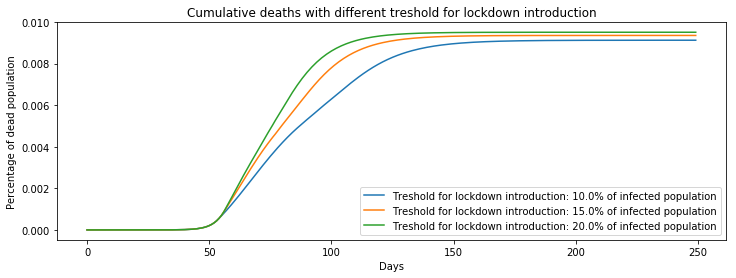

In [15]:
different_impose_lockdowns = [0.1,0.15,0.2] 


contacts= 4            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery
mutation_start = 100   #At whitch day mutation start T
impose_lockdown=0.1
lockdown=2/5
dead_ratio=0.001

print("")

for impose_lockdown in different_impose_lockdowns:

    count_dead(contacts, infection_rate, recovery_rate,impose_lockdown, lockdown,dead_ratio)
    
pyplot.title("Cumulative deaths with different treshold for lockdown introduction")
pyplot.ylabel("Percentage of dead population")
pyplot.xlabel("Days")
pyplot.legend()
pyplot.show()

This case study shows partly contraintuitive result that although lockdowns are introduced with significantly different numbers of currently infected, the cumulative death toll is almost the same, only the deaths are spread over a longer period of time. 

## Case stdudy 2 

This case study shows a simulation of a limited number of ICU beds in the seirvip seir model, in which lockdown is introduced at a predefined level. If they are overdrawn, the mortality rate will increase by +0.004. 

In [20]:
def out_of_beds(contacts, infection_rate, dead_ratio, recovery_rate, impose_lockdown, lockdown, simulations=100, population=10_000_000, initialy_infected=1):
    """This function calculates deaths and cumulative deaths for situation when there are limited number of ICU beds and the lockdown is imposed at predefined level"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    contacts_model = np.zeros([simulations])
    dead = np.zeros([simulations])
    deaths = np.zeros([simulations])
    moving_dead_ratio = np.zeros([simulations])
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        
        if infected[t]<=impose_lockdown:
            contacts_model[t]=contacts
        else:
            contacts_model[t]=contacts*lockdown
            
            
        if infected[t]<=hospital_limit:
            moving_dead_ratio[t]=dead_ratio
        else:
            moving_dead_ratio[t]=dead_ratio+without_hospitals
            
            
        infected[t+1]=infected[t]+infected[t]*contacts_model[t]*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        dead[t+1]=dead[t]+infected[t]*moving_dead_ratio[t]
        deaths[t+1]=infected[t]*moving_dead_ratio[t]
        susceptiable[t+1]=susceptiable[t]-contacts_model[t]*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
        dead_cumulative=dead[simulations-1]
        
    
    pyplot.plot(deaths)
    pyplot.ylim(0,0.005)
    pyplot.ylabel("Deaths per day (% of population)")
    pyplot.xlabel("Days")
    pyplot.title(f"Number of deaths per day, ICU beds availible for {hospital_limit*100}% of population at one time")
    pyplot.show()
    
            
    print(f"If there are ICU beds for {hospital_limit*100}% of population at one time, then cumulatively died {round(dead_cumulative*100,3)}% of population")    
    print("")
    print("")
    print("")

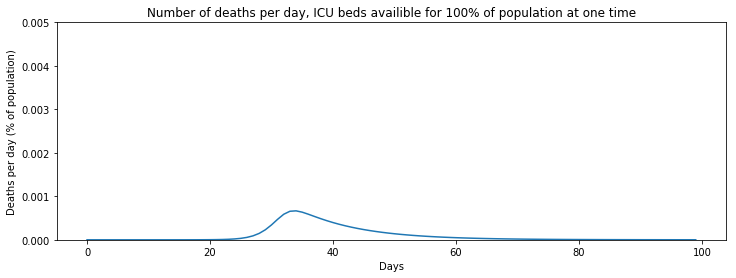

If there are ICU beds for 100% of population at one time, then cumulatively died 0.999% of population





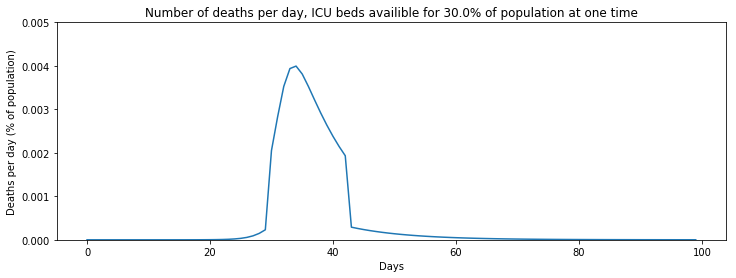

If there are ICU beds for 30.0% of population at one time, then cumulatively died 4.242% of population





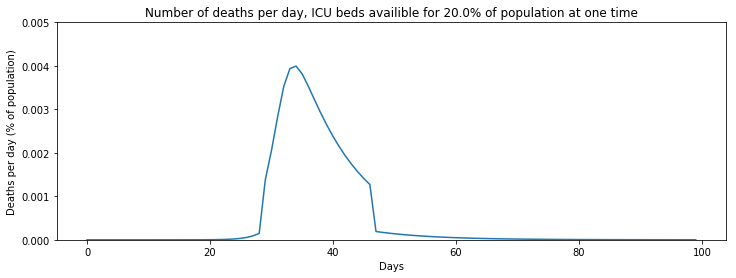

If there are ICU beds for 20.0% of population at one time, then cumulatively died 4.857% of population





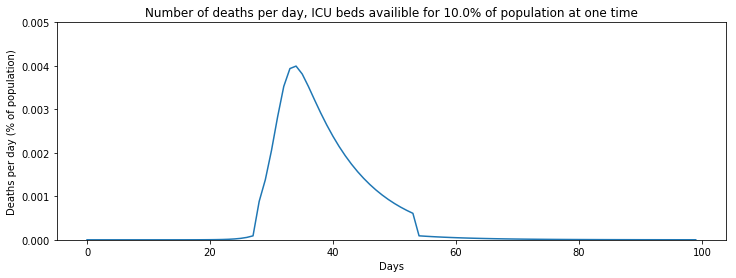

If there are ICU beds for 10.0% of population at one time, then cumulatively died 5.428% of population





In [21]:
different_hospital_limits = [1, 0.3, 0.2, 0.1] 

contacts= 4            #How many contacts per day has an average person T
infection_rate=0.20    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery
lockdown=2/5           #Shows when the lockdown is imposed
dead_ratio=0.001       #Probability of death when infected (percentage)
impose_lockdown=2      #When the lockdown is imposed
without_hospitals=dead_ratio+0.004  #When are all icu beds full, then dead_ratio is higher by 0.004

print("")
for hospital_limit in different_hospital_limits:
    
    out_of_beds(contacts, infection_rate, dead_ratio, recovery_rate, impose_lockdown, lockdown)

The graphs show an intuitive result, namely that the number of deaths depends on the number of beds on ICU beds (ie on the number of people they will not be left with). If ICU beds are for all, then with these parameters cumulatively die 0.999% of population, if for 10%, then 5.428% of population. 